In [1]:
import string

import pandas as pd
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data/poems.csv')

df.head(10)

,Author,Line
0,Борис Рыжий,и как это лучше сказать:
1,Дмитрий Пригов,На меня страна
2,Дмитрий Пригов,А в общем-то — судьбы игрушка
3,Борис Рыжий,мая второго дня.
4,Борис Рыжий,в свете всех светофоров и фар.
5,Дмитрий Пригов,"А уж как, едрена мать"
6,Дмитрий Пригов,Но он не поддался и на эту хитрость
7,Борис Рыжий,лучше рылом в грязь.
8,Дмитрий Пригов,"Случайность вроде бы, казалось"
9,Дмитрий Пригов,Сам немножечко поел


In [2]:
# remove punctuation
df['Line'] = df['Line'].apply(
    lambda s: str(s).translate(
        str.maketrans('', '', string.punctuation + '—')
    )
)
df['Line'] = df['Line'].apply(
    lambda s: str(s).replace("  ", " ")
)

df.head()

,Author,Line
0,Борис Рыжий,и как это лучше сказать
1,Дмитрий Пригов,На меня страна
2,Дмитрий Пригов,А в общемто судьбы игрушка
3,Борис Рыжий,мая второго дня
4,Борис Рыжий,в свете всех светофоров и фар


In [3]:
# find most common words
lines = [str(l).lower().split() for l in df['Line']]
words = []
for l in lines:
    words += l

common_counter = Counter(words).most_common(10)
common = [w for w, _ in common_counter]
common

['и', 'в', 'не', 'я', 'а', 'на', 'что', 'с', 'вот', 'как']

In [4]:
# linearize
def remove_common(s: str) -> str:
    new_s = s.lower()
    for w in common:
        if new_s.startswith(w + ' '):
            new_s = new_s[len(w) + 1:]
        if new_s.endswith(' ' + w):
            new_s = new_s[:-(len(w) + 1)]
        new_s = new_s.replace(' ' + w + ' ', " ")
    return new_s

df['Line'] = df['Line'].apply(remove_common)

df.head()

,Author,Line
0,Борис Рыжий,это лучше сказать
1,Дмитрий Пригов,меня страна
2,Дмитрий Пригов,общемто судьбы игрушка
3,Борис Рыжий,мая второго дня
4,Борис Рыжий,свете всех светофоров фар


In [5]:
# predict
vec = CountVectorizer().fit_transform(df.Line)
train_x, test_x, train_y, test_y = train_test_split(vec, df.Author, train_size=0.8)

model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)
prediction = model.predict(test_x)

print("accuracy:", accuracy_score(test_y, prediction))
print("F-score:", f1_score(test_y, prediction, pos_label="Борис Рыжий"))

accuracy: 0.6987951807228916
F-score: 0.6666666666666667


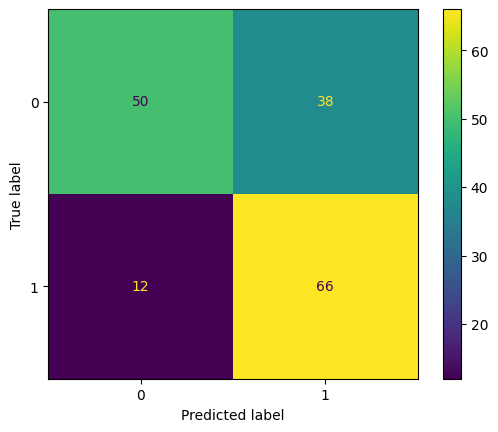

In [6]:
cm = confusion_matrix(test_y, prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot()